In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.filters import try_all_threshold
from skimage.filters import threshold_minimum, threshold_otsu, threshold_isodata, threshold_mean
from skimage.exposure import equalize_adapthist, equalize_hist, rescale_intensity
from skimage.morphology import reconstruction
from os import listdir
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk

In [2]:
img = imread('C:/Users/DELL/Documents/GitHub/21Cs460_group12/Code and Data/WBC_data_kaggle/main_dataset/test/EOSINOPHIL/_0_967.jpeg', as_gray=True)
img1 = equalize_adapthist(img)
img2 = equalize_hist(img)

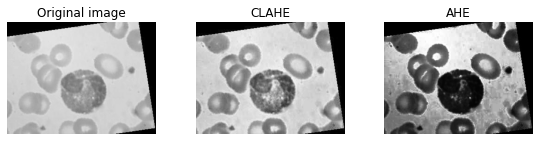

In [3]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(img, cmap = 'gray')
ax0.set_title("Original image")
ax0.axis('off')
ax1.imshow(img1, cmap='gray')
ax1.set_title("CLAHE")
ax1.axis('off')
ax2.imshow(img2, cmap='gray')
ax2.set_title("AHE")
ax2.axis('off')

fig.tight_layout()

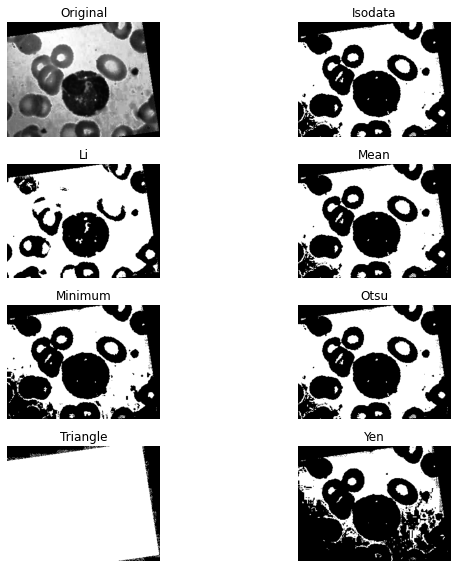

In [4]:
fig, ax = try_all_threshold(img2, figsize=(10, 8), verbose=False)
plt.show()

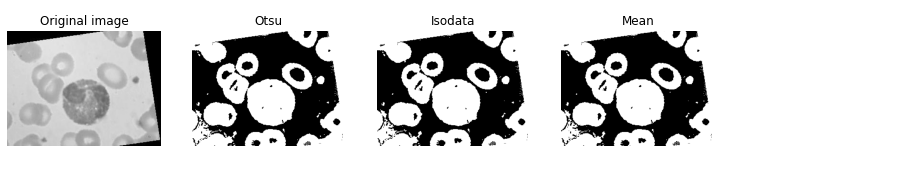

In [5]:
thresh1 = threshold_otsu(img2)
binary1 = img2 < thresh1

thresh2 = threshold_isodata(img2)
binary2 = img2 < thresh2

thresh3 = threshold_mean(img2)
binary3 = img2 < thresh3

fig, axes = plt.subplots(ncols=5, figsize=(16, 3))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary1, cmap=plt.cm.gray)
ax[1].set_title('Otsu')

ax[2].imshow(binary2, cmap=plt.cm.gray)
ax[2].set_title('Isodata')

ax[3].imshow(binary3, cmap=plt.cm.gray)
ax[3].set_title('Mean')

for a in ax:
    a.axis('off')

plt.show()

In [6]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

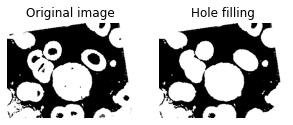

In [7]:
mask = binary1
seed = np.copy(binary1)
seed[1:-1, 1:-1] = binary1.max()
eroded = reconstruction(seed, mask, method='erosion')

fig, ax = plt.subplots(ncols=2, figsize=(5, 4), sharex=True, sharey=True)
ax = ax.ravel()
ax[0].imshow(binary1, cmap='gray')
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(eroded, cmap='gray')
ax[1].set_title('Hole filling')
ax[1].axis('off')
plt.show()

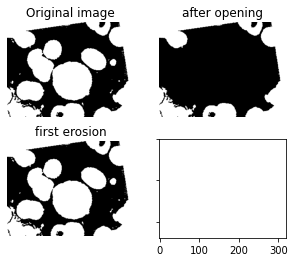

In [10]:
seed = np.copy(eroded)
seed[1:-1, 1:-1] = eroded.max()
mask = eroded
ero2 = reconstruction(seed, mask, method='erosion')

seed = np.copy(ero2)
seed[1:-1, 1:-1] = ero2.min()
mask = ero2
opening = reconstruction(seed, mask, method='dilation')

fig, ax = plt.subplots(2,2, figsize=(5, 4), sharex=True, sharey=True)
ax = ax.ravel()
ax[0].imshow(eroded, cmap='gray')
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(opening, cmap='gray')
ax[1].set_title('after opening')
ax[1].axis('off')

ax[2].imshow(ero2, cmap='gray')
ax[2].set_title('first erosion')
ax[2].axis('off')
plt.show()